# Overview
Incident Management and Response is a key component of any IT Service Management Strategy. These are the typical steps involved in the Incident Management Process:
- Receipt of the issue 
- Create a ticket
- Review of the ticket by L1/L2 teams
- Attempt to resolve the ticket using Standard Operating Procedures by L1/L2
- If needed, transfer the ticket to the appropriate L3 team for further review and resolving.


# Current ‘Pain’ Points
Currently the organization sees these issues in the Incident Ticket Management Process:
The process is largely ‘manual’. L1/L2 teams need to spend time to review Standard Operating Procedures (SOPs) before assigning to functional teams. Minimum 25-30% incidents needs to be reviewed for SOPs before ticket assignment. 

- Minimum 1 FTE effort needed only for incident assignment to L3 teams

- Human error - many times the incident gets assigned to the wrong L3 team. So additional effort needed to reassign to the correct team after re-review of the ticket, this not only increases the manual effort needed BUT also leads to customer dis-satisfaction because the customer who opened the ticket is left frustrated because the ticket is in limbo being tossed between various teams before getting to the actual team who can help resolve the issued.
 

# Objective of this Project
Create various Machine Learning Models that can help classify incidents and assign them to the right Functional Group. Our objective is to create NLP models that can predict with at least 85% accuracy.





In [1]:
!pip install wordcloud
#!pip install langdetect
#!pip install googletrans
#!pip install textblob
!pip install spacy
#!python -m spacy download en
#!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md
#!python -m spacy download en_core_web_lg
!pip install -U spacy-lookups-data
#!pip install langid
!pip install google_trans_new
#!pip uninstall googletrans
!pip install autocorrect
!pip install ftfy
!pip install seaborn
!pip install nltk
!pip install bs4
!pip install xgboost
!pip install nbconvert[webpdf]

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')
Requirement already up-to-date: spacy-lookups-data in /usr/local/lib/python3.6/dist-packages (0.3.2)


In [2]:
import itertools
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS 
#from langdetect import detect
from itertools import cycle
#import googletrans
#from googletrans import Translator
from google_trans_new import google_translator 
from multiprocessing.dummy import Pool as ThreadPool
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
from sklearn import preprocessing
#from textblob import TextBlob
#from textblob.translate import NotTranslated
import random
import operator
import math
import tqdm
import time
import spacy
import json
#import langid
from bs4 import BeautifulSoup
from string import digits

from autocorrect import Speller
from ftfy import fix_encoding, fix_text, fix_text_segment, badness


### This section below contains  Useful Functions 
- As we find new functions, we will create them here.

In [3]:
contractions_dict = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"didnt": "did not",
"doesnt": "does not",
"thats": "that is",
"wasnt": "was not",
"weren": "were not",
"theyre": "there",
"dont": "do not",
"cant": "cannot",
"arent": "are not",
"whats": "what is",
"you've": "you have"
}
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [4]:
#Most frequently occuring words
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

#Most frequently occuring Bi-grams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

def fn_word_cloud(column):
    
    comment_words = ' '
    stopwords = set(STOPWORDS)

    # iterate through the csv file 
    for val in column: 

        # typecaste each val to string 
        val = str(val) 

        # split the value 
        tokens = val.split() 

        # Converts each token into lowercase 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 

        for words in tokens: 
            comment_words = comment_words + words + ' '


    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(comment_words) 
    
    return wordcloud

def removeString(data, regex):
    return data.str.lower().str.replace(regex.lower(), ' ')

def preprocess(dataset, columnsToPreprocess, regexList):
    for column in columnsToPreprocess:
        #for regex in regexList:
            #dataset[column] = removeString(dataset[column], regex)
            dataset[column] = dataset[column].apply(clean_step2)
    return dataset

def clean_step2(text):
#1)remove html tags    
   soup=BeautifulSoup(text,"html.parser")
   text=soup.get_text(separator="")
    
#2) Remove non-ASCII characters
   encoded_string = text.encode("ascii", "ignore")
   text= encoded_string.decode()
   
#3)lower case    
   text=text.lower()
   text = ' '.join([w for w in text.split()])

#4)remove punctuation       
   text = re.sub(r'[^\w\s]', '',text) 
   
#5)remove whitespaces
   text=" ".join(text.split())
 
#6)remove  digits  
   remove_digits = str.maketrans('', '', digits) 
   text = text.translate(remove_digits) 
    
#7)remove emails   
   text = re.sub(r'\S*@\S*\s?', '', text)
   
#8)remove hyperlinks
   text = re.sub(r'https?:\/\/.*\/\w*','', text)
   
#9)remove other characters   
   text=text.replace("_"," ")
  
   text=text.replace("\\"," ")
   return text   

def getRegexList():
    '''
    Adding regex list as per the given data set to flush off the unnecessary text
    
    '''
    regexList = []
    regexList += ['From:(.*)\r\n']  # from line
    regexList += ['Sent:(.*)\r\n']  # sent to line
    regexList += ['received from:(.*)\r\n']  # received data line
    regexList += ['received']  # received data line
    regexList += ['To:(.*)\r\n']  # to line
    regexList += ['CC:(.*)\r\n']  # cc line
    regexList += ['(.*)infection']  # footer
    regexList += ['\[cid:(.*)]']  # images cid
    regexList += ['https?:[^\]\n\r]+']  # https & http
    regexList += ['Subject:']
    regexList += ['[\w\d\-\_\.]+@[\w\d\-\_\.]+']  # emails are not required
    regexList += ['[0-9][\-0–90-9 ]+']  # phones are not required
    regexList += ['[0-9]']  # numbers not needed
    regexList += ['[^a-zA-z 0-9]+']  # anything that is not a letter
    regexList += ['[\r\n]']  # \r\n
    regexList += [' [a-zA-Z] ']  # single letters makes no sense
    regexList += [' [a-zA-Z][a-zA-Z] ']  # two-letter words makes no sense
    regexList += ["  "]  # double spaces
    
    regexList += ['^[_a-z0-9-]+(\.[_a-z0-9-]+)*@[a-z0-9-]+(\.[a-z0-9-]+)*(\.[a-z]{2,4})$']
    regexList += ['[\w\d\-\_\.]+ @ [\w\d\-\_\.]+']
    regexList += ['Subject:']
    regexList += ['[^a-zA-Z]']

    return regexList


def lemmatize(stringlist):
    processed_all_documents = list()

    for desc in stringlist:
        word_tokens = word_tokenize(desc) 
    
        filtered_sentence = [] 

        # Removing Stopwords
        for w in word_tokens: 
            if w not in stop_words: 
                filtered_sentence.append(w) 
    
        # Lemmetization
        lemma_word = []
        wordnet_lemmatizer = WordNetLemmatizer()
        for w in filtered_sentence:
            word1 = wordnet_lemmatizer.lemmatize(w, pos = "n")
            word2 = wordnet_lemmatizer.lemmatize(word1, pos = "v")
            word3 = wordnet_lemmatizer.lemmatize(word2, pos = ("a"))
            lemma_word.append(word3)
        words = ' '.join(lemma_word)
        processed_all_documents.append(words) 
    return processed_all_documents


# Write a function to apply to the dataset to detect garbage data
def detect_garbage(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False
    


# Milestone 1: Pre-Processing, Data Visualisation and EDA

1. Exploring the given Data files
2. Understanding the structure of data
3. Missing points in data
4. Finding inconsistencies in the data
5. Visualizing different patterns
6. Visualizing different text features
7. Dealing with missing values
8. Text preprocessing
9. Creating word vocabulary from the corpus of report text data
10. Creating tokens as required

This notebook contains the detailed steps on our path to accomplishing the goals set for Milestone 1

# EDA

##### We manually create the csv file from the excel and use pandas to read the csv.
- For some reason when we use the read_excel function, the number of NaN increase to 8 

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
mydata = pd.read_csv('drive/My Drive/datasets/input_data.csv')
#mydata = pd.read_excel("datasets/input_data.xlsx")

In [7]:
mydata.head(20)

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_1
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0


In [8]:
mydata.shape

(8500, 4)

###### Observation:
- There are 8500 records in the dataset
- Each Dataset contains 4 columns
- The column 'Caller' seems to contain only junk. We will drop it. 

In [9]:
mydata = mydata.drop('Caller',axis=1)

In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8498 non-null   object
 1   Description        8499 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


In [11]:
# Missing data check #1:
mydata.describe(include='all') 

,Short description,Description,Assignment group
count,8498,8499,8500
unique,7482,7817,74
top,password reset,the,GRP_0
freq,38,56,3976


### We also notice some records with junks characters in Short Description and Description

In [12]:
mydata['Short description'] = mydata['Short description'].astype(str)
mydata['Description'] = mydata['Description'].astype(str)
mydata['Assignment group'] = mydata['Assignment group'].astype(str)

In [13]:
# Check the dataset for garbage data
mydata[~mydata.iloc[:,:-1].applymap(detect_garbage).all(1)]
mydata['Description'].apply(detect_garbage)

0        True
1        True
2        True
3        True
4        True
        ...  
8495     True
8496     True
8497     True
8498     True
8499    False
Name: Description, Length: 8500, dtype: bool

In [14]:
print(mydata.iloc[7126]['Short description'])
print(mydata.iloc[7969]['Description'])

ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘
å®¢æˆ·æä¾›çš„åœ¨çº¿é€è´§å•ç”Ÿæˆç³»ç»Ÿæ‰“ä¸å¼€ï¼Œéœ€å°½å¿«è§£å†³


In [15]:
# Take an example of row# 7126 Short Desc and fix it
print('Junk text: \033[1m%s\033[0m\nFixed text: \033[1m%s\033[0m' % (mydata['Short description'][7126], 
                                                                        fix_text(mydata['Short description'][7126])))

# List all mojibakes defined in ftfy library
print('\nMojibake Symbol RegEx:\n', badness.MOJIBAKE_SYMBOL_RE.pattern)

Junk text: ç”µè„‘å¡ä¸”è¿žä¸ä¸Šå†…ç½‘
Fixed text: 电脑卡且连不上内网

Mojibake Symbol RegEx:
 [ÂÃÎÏÐÑØÙĂĎĐŃŘŮ][-€ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¢£¤¥¦§¨ª«¬¯°±²³µ¶·¸¹º¼½¾¿ˇ˘˝]|[ÂÃÎÏÐÑØÙĂĎĐŃŘŮ][›»‘”´©™]\w|×[-ƒ‚„†‡ˆ‰‹Œ“•˜œŸ¡¦§¨ª«¬¯°²³ˇ˘›‘”´©™]|[¬√][ÄÅÇÉÑÖÜáàâäãåçéèêëíìîïñúùûü†¢£§¶ß®©™≠ÆØ¥ªæø≤≥]|\w√[±∂]\w|◊|[ðđ][Ÿ]|â€|вЂ[љћ¦°№™ќ“”]


In [16]:
# Sanitize the dataset from Mojibakes
mydata['Short description'] = mydata['Short description'].apply(fix_text_segment)
mydata['Description'] = mydata['Description'].apply(fix_text)

# Visualize that row# 7126
mydata.iloc[7126,:]

Short description                                            电脑卡且连不上内网
Description          \n\nreceived from: tuqrvowp.fxmzkvqo@gmail.com...
Assignment group                                                GRP_30
Name: 7126, dtype: object

#  Observation
- There seem to a few invalid values in Sort Description & Description.
- On further checking we find that they can be converted to valid non english alphabets using ftfy library

In [17]:
mydata.iloc[1081,:]

Short description                                 用友软件问题
Description          打开已关闭的销售订单时,显示"不能在手动或分布事物方式下创建新的链接"
Assignment group                                  GRP_48
Name: 1081, dtype: object

In [18]:
df = mydata.query('Description == ""')
df

,Short description,Description,Assignment group


In [19]:
## Missing data check #2 : 
## Are there any null values
mydata.isna().apply(pd.value_counts)
## Short Description contains 2 nulls and Description contains 1 null 

,Short description,Description,Assignment group
False,8500,8500,8500


In [20]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

,Short description,Description,Assignment group


In [21]:
#This method is useful because it shows count, mean, and standard deviation along with the 5 point summary
mydata.describe().T

,count,unique,top,freq
Short description,8500,7483,password reset,38
Description,8500,7815,the,56
Assignment group,8500,74,GRP_0,3976


#### Number of classes in the Assignment Group 

In [22]:
len(mydata['Assignment group'].unique())

74

#### Assignment Group Values

In [23]:
mydata['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

###### Assignment Group Distribution

In [24]:
df_assignment_group_dist = mydata['Assignment group'].value_counts().reset_index()
df_assignment_group_dist['percentage'] = (df_assignment_group_dist['Assignment group']/df_assignment_group_dist['Assignment group'].sum())*100
df_assignment_group_dist.head(20)

,index,Assignment group,percentage
0,GRP_0,3976,46.776471
1,GRP_8,661,7.776471
2,GRP_24,289,3.400000
3,GRP_12,257,3.023529
4,GRP_9,252,2.964706
5,GRP_2,241,2.835294
6,GRP_19,215,2.529412
7,GRP_3,200,2.352941
8,GRP_6,184,2.164706
9,GRP_13,145,1.705882


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1605: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  color=self.colors, align="center", **kws)


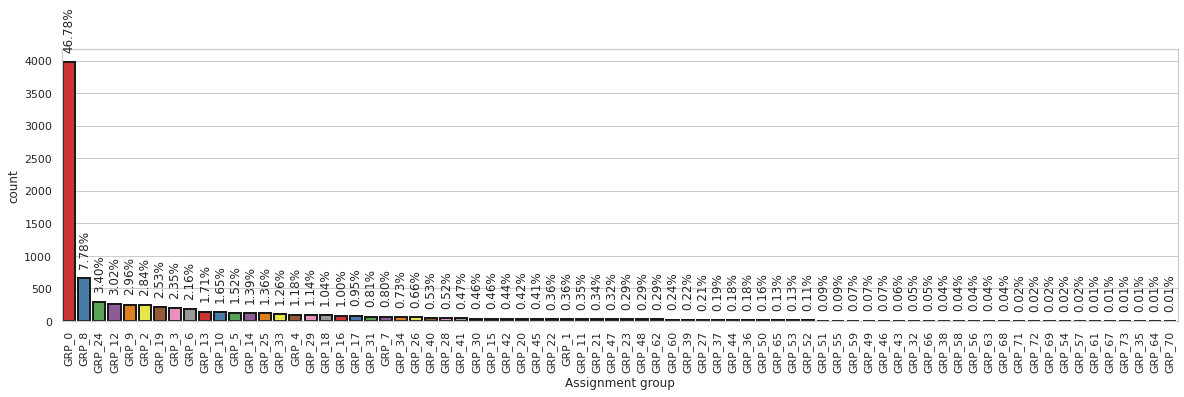

In [25]:
# Plot to visualize the percentage data distribution across different groups
sns.set(style="whitegrid")
plt.figure(figsize=(20,5))
order = mydata["Assignment group"].value_counts().index

ax = sns.countplot(x="Assignment group", data=mydata, order=order, linewidth=2,
                  edgecolor = "k"*len(order), palette='Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
  ax.annotate(str(format(p.get_height()/len(mydata.index)*100, '.2f')+"%"), 
              (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'bottom',
              rotation=90, xytext = (0, 10), textcoords = 'offset points')

# Observation
- Group 0 has the most entries - this is expected because we guess Grp_0 is L1 - so gets the most tickets and also resolves them directly based on SOPs (Standard Operating Procedures)

#### Top 20 Assignment groups with highest number of tickets

In [26]:
df_top_20 = mydata['Assignment group'].value_counts().nlargest(20).reset_index()
df_top_20

,index,Assignment group
0,GRP_0,3976
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
5,GRP_2,241
6,GRP_19,215
7,GRP_3,200
8,GRP_6,184
9,GRP_13,145


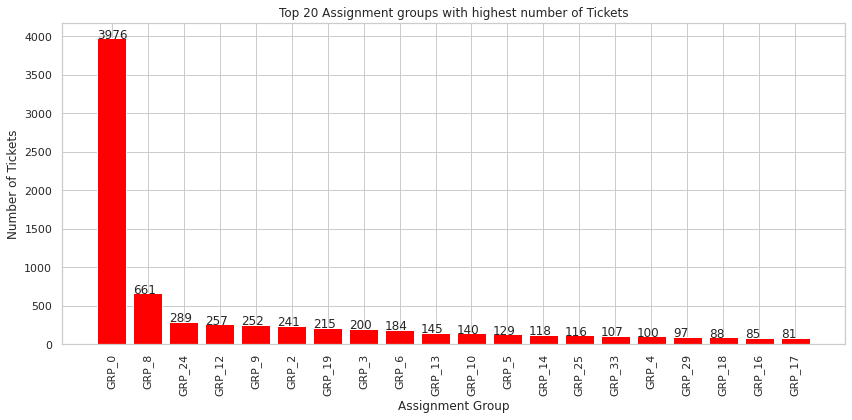

In [27]:
colors = ['red', 'blue', 'green']
i = -1
def getCycledColor():
    global i, colors
    if i < len(colors) -1:
        i = i + 1
        return colors[i]
    else:
        i = -1
plt.figure(figsize=(12,6))
bars = plt.bar(df_top_20['index'],df_top_20['Assignment group'], facecolor=getCycledColor())
plt.title('Top 20 Assignment groups with highest number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Bottom 20 Assignment groups with least number of tickets

In [28]:
df_bottom_20 = mydata['Assignment group'].value_counts().nsmallest(20).reset_index()
df_bottom_20

,index,Assignment group
0,GRP_61,1
1,GRP_67,1
2,GRP_73,1
3,GRP_35,1
4,GRP_64,1
5,GRP_70,1
6,GRP_71,2
7,GRP_72,2
8,GRP_69,2
9,GRP_54,2


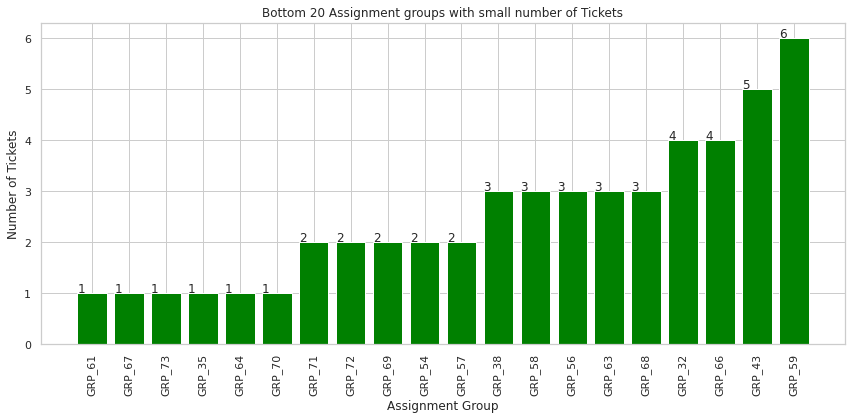

In [29]:
plt.figure(figsize=(12,6))
bars = plt.bar(df_bottom_20['index'],df_bottom_20['Assignment group'], color='green')
plt.title('Bottom 20 Assignment groups with small number of Tickets')
plt.xlabel('Assignment Group')
plt.xticks(rotation=90)
plt.ylabel('Number of Tickets')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.tight_layout()
plt.show()

#### Distribution of tickets counts in various bins

In [30]:
df_bins = pd.DataFrame(columns=['Description','Ticket Count'])
one_ticket = {'Description':'1 ticket','Ticket Count':len(df_assignment_group_dist[df_assignment_group_dist['Assignment group'] < 2])}
_2_5_ticket = {'Description':'2-5 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 1)& (df_assignment_group_dist['Assignment group'] < 6) ])}
_10_ticket = {'Description':' 6-10 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 5)& (df_assignment_group_dist['Assignment group'] < 11)])}
_10_20_ticket = {'Description':' 11-20 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 10)& (df_assignment_group_dist['Assignment group'] < 21)])}
_20_50_ticket = {'Description':' 21-50 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 20)& (df_assignment_group_dist['Assignment group'] < 51)])}
_51_100_ticket = {'Description':' 51-100 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 50)& (df_assignment_group_dist['Assignment group'] < 101)])}
_100_ticket = {'Description':' >100 ticket',
              'Ticket Count':len(df_assignment_group_dist[(df_assignment_group_dist['Assignment group'] > 100)])}
#append row to the dataframe
#append row to the dataframe
df_bins = df_bins.append([one_ticket,_2_5_ticket,_10_ticket,
                          _10_20_ticket,_20_50_ticket,_51_100_ticket,_100_ticket], ignore_index=True)

df_bins

,Description,Ticket Count
0,1 ticket,6
1,2-5 ticket,13
2,6-10 ticket,6
3,11-20 ticket,9
4,21-50 ticket,16
5,51-100 ticket,9
6,>100 ticket,15


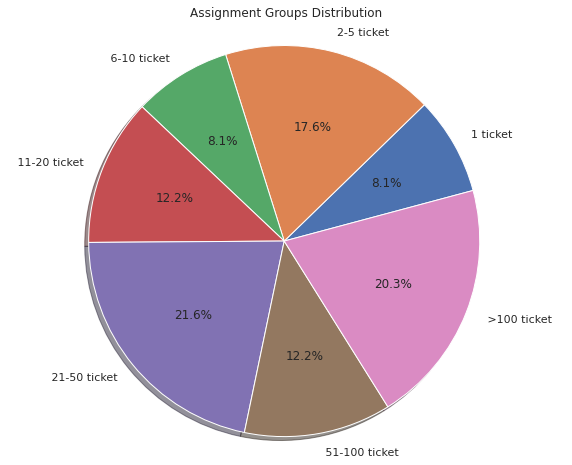

In [31]:
plt.figure(figsize=(10, 8))
plt.pie(df_bins['Ticket Count'],labels=df_bins['Description'],autopct='%1.1f%%', startangle=15, shadow = True);
plt.title('Assignment Groups Distribution')
plt.axis('equal');

# Fetch wordcount for each Ticket in its raw state 
- (so far we have handled only junk characters and replaced any Nans with empty strings)
- We will merge the Short and Description fields just to perform EDA on the tickets. We will redo this (merge step) later after translation

In [32]:
#merging  the 2 preprocessed columns to a single column without duplicate words
mydata['Raw Combined description'] = mydata['Short description'] .map(str) + ' ' +  mydata['Description'].map(str)    
mydata['Raw Combined description'] = mydata['Raw Combined description'].apply(lambda x: ' '.join(pd.unique(x.split()))) 

mydata['raw_word_count'] = mydata['Raw Combined description'].apply(lambda x: len(str(x).split(" ")))
mydata[['Raw Combined description','raw_word_count']].head()

,Raw Combined description,raw_word_count
0,login issue -verified user details.(employee# ...,28
1,outlook received from: hmjdrvpb.komuaywn@gmail...,24
2,cant log in to vpn received from: eylqgodm.ybq...,13
3,unable to access hr_tool page,5
4,skype error,2


In [33]:
df = mydata.query('Description == ""')
df

,Short description,Description,Assignment group,Raw Combined description,raw_word_count


In [34]:
#Identify common words
freq = pd.Series(' '.join(mydata['Raw Combined description']).split()).value_counts()[:20]
freq

to                             3316
in                             2642
the                            2555
from:                          2445
received                       2329
is                             1937
not                            1688
on                             1592
and                            1545
please                         1524
for                            1482
i                              1261
a                              1164
of                             1052
it                             1017
job                             997
erp                             969
monitoring_tool@company.com     961
password                        937
unable                          870
dtype: int64

# We now will list the most common words used - in this round will NOT remove any stop words - we will do that later and repeat this step 

[Text(0, 0, 'to'),
 Text(0, 0, 'in'),
 Text(0, 0, 'the'),
 Text(0, 0, 'from:'),
 Text(0, 0, 'received'),
 Text(0, 0, 'is'),
 Text(0, 0, 'not'),
 Text(0, 0, 'on'),
 Text(0, 0, 'and'),
 Text(0, 0, 'please'),
 Text(0, 0, 'for'),
 Text(0, 0, 'i'),
 Text(0, 0, 'a'),
 Text(0, 0, 'of'),
 Text(0, 0, 'it'),
 Text(0, 0, 'job'),
 Text(0, 0, 'erp'),
 Text(0, 0, 'monitoring_tool@company.com'),
 Text(0, 0, 'password'),
 Text(0, 0, 'unable')]

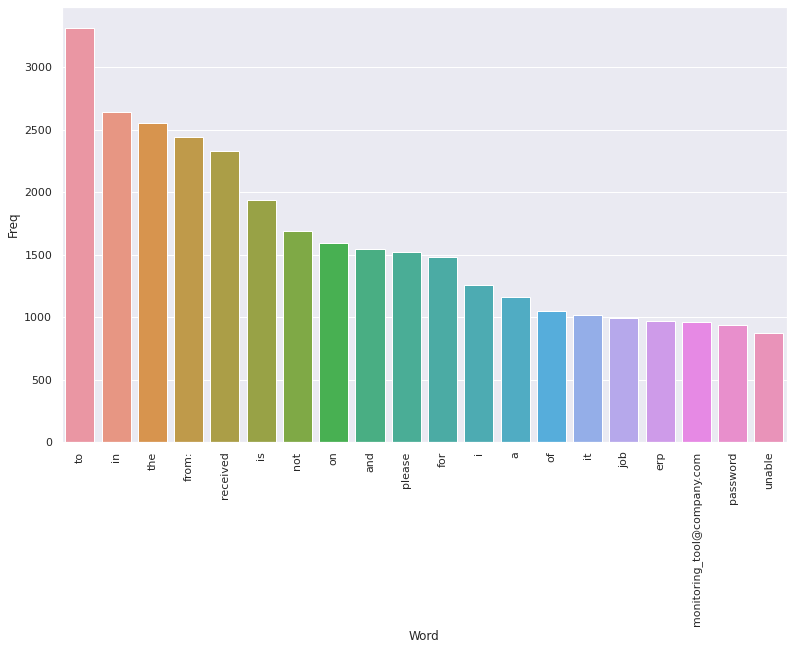

In [35]:
top_df = pd.DataFrame(freq)
top_df.reset_index(level=0, inplace=True) 
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [36]:
#Identify uncommon words
freq1 =  pd.Series(' '.join(mydata['Raw Combined description']).split()).value_counts()[-20:]
freq1

helpline,        1
umziehen         1
(csr             1
ptczqbdw         1
sl2              1
zmmdata          1
unresponsive.    1
ec               1
9169475765       1
6334             1
7019             1
.zip.            1
paths,           1
"pr05"           1
possibilities    1
smhdyhtis        1
vvspecmfrt       1
31565532         1
hits             1
qjtimdsp         1
dtype: int64

[Text(0, 0, 'helpline,'),
 Text(0, 0, 'umziehen'),
 Text(0, 0, '(csr'),
 Text(0, 0, 'ptczqbdw'),
 Text(0, 0, 'sl2'),
 Text(0, 0, 'zmmdata'),
 Text(0, 0, 'unresponsive.'),
 Text(0, 0, 'ec'),
 Text(0, 0, '9169475765'),
 Text(0, 0, '6334'),
 Text(0, 0, '7019'),
 Text(0, 0, '.zip.'),
 Text(0, 0, 'paths,'),
 Text(0, 0, '"pr05"'),
 Text(0, 0, 'possibilities'),
 Text(0, 0, 'smhdyhtis'),
 Text(0, 0, 'vvspecmfrt'),
 Text(0, 0, '31565532'),
 Text(0, 0, 'hits'),
 Text(0, 0, 'qjtimdsp')]

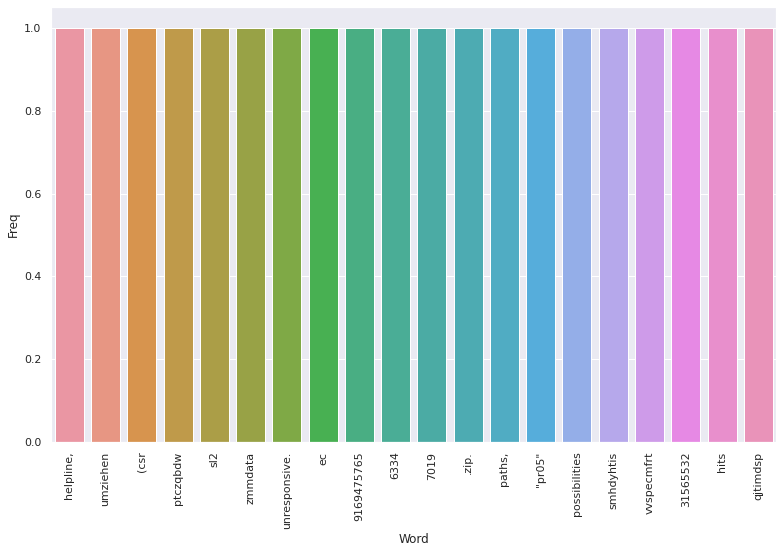

In [37]:
top_df = pd.DataFrame(freq1)
top_df.reset_index(level=0, inplace=True) 
top_df.columns=["Word", "Freq"]
#Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [38]:
#data = mydata
#data["Assignment group"] = data["Assignment group"].apply(lambda x: x.replace("GRP_", ""))
#data["Assignment group"] = data["Assignment group"].astype(int)
#data

##### Now let's cleanup the null values in Short Description and Description fields

In [39]:
mydata[mydata['Description'].isnull()]

,Short description,Description,Assignment group,Raw Combined description,raw_word_count


In [40]:
mydata[mydata['Short description'].isnull()]

,Short description,Description,Assignment group,Raw Combined description,raw_word_count


In [41]:
#Replace NaN values in Short Description and Description columns
#mydata['Short description'] = mydata['Short description'].replace(np.nan, '', regex=True)
#mydata['Description'] = mydata['Description'].replace(np.nan, '', regex=True)

In [42]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

,Short description,Description,Assignment group,Raw Combined description,raw_word_count


In [43]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Short description         8500 non-null   object
 1   Description               8500 non-null   object
 2   Assignment group          8500 non-null   object
 3   Raw Combined description  8500 non-null   object
 4   raw_word_count            8500 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 332.2+ KB


In [44]:
mydata.iloc[1178,:]

Short description           电话机没有声音
Description                 电话机没有声音
Assignment group             GRP_30
Raw Combined description    电话机没有声音
raw_word_count                    1
Name: 1178, dtype: object

In [45]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count
False,8500,8500,8500,8500,8500


In [46]:
mydata.head(20)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,28
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,24
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,13
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page,5
4,skype error,skype error,GRP_0,skype error,2
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in engineering tool and skype,8
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,event: critical:HostName_221.company.com the v...,12
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...,9
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,unable to disable add ins on outlook,7
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,ticket update on inplant_874773,4


##### Now let's merge the Short Description and Description to a new field - Combined Description . This will help us create a rich corpus
- Please note we are doing this now to help us with the word cloud step. 
- We will repeat this step later again if we find non english characters that we need to translate. This step will be repeated after the translation is done

In [47]:
mydata2 = mydata.copy()

In [48]:
mydata.iloc[1178,:]

Short description           电话机没有声音
Description                 电话机没有声音
Assignment group             GRP_30
Raw Combined description    电话机没有声音
raw_word_count                    1
Name: 1178, dtype: object

In [49]:
#merging  the 2 preprocessed columns to a single column without duplicate words
mydata2['Combined description'] = mydata2['Short description'] .map(str) + ' ' +  mydata2['Description'].map(str)
                    
mydata2['Combined description'] = mydata2['Combined description'].apply(lambda x: ' '.join(pd.unique(x.split()))) 
   
#testing on single entry
print(mydata2.iloc[279]['Short description'])
print(mydata2.iloc[279]['Description'])
print(mydata2.iloc[279]['Combined description']) 
print(mydata2.iloc[7126]['Short description'])
print(mydata2.iloc[7126]['Combined description'])
print(mydata2.iloc[7969]['Description'])
print(mydata2.iloc[7969]['Combined description'])

unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment.
please provide the following:

what order number? 

what material or item number?  mm#2110924

what warehouse location? plant_308 0001 

issue description / error message? see attachment
unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment. please provide the following: what order number? material or item mm#2110924 warehouse location? plant_308 0001 issue description / error message? attachment
电脑卡且连不上内网
电脑卡且连不上内网 received from: tuqrvowp.fxmzkvqo@gmail.com 电脑卡且连不上内网,请转贺正平 tuqrvowp fxmzkvqo 钱唐鑫 human resources tuqrvowp.fxmzkvqo@gmail.com<mailto:tuqrvowp.fxmzkvqo@gmail.com> 中国上海奉贤陈桥路1508号
客户提供的在线送货单生成系统打不开,需尽快解决
客户提供的在线系统打不开 客户提供的在线送货单生成系统打不开,需尽快解决


# now let's print the word cloud
- Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of al data (such as a speech blog post, or database), the bigger and bolder it appears in the word cloud.

- A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.

- Also known as tag clouds or text clouds, these are ideal ways to pull out the most pertinent parts of textual data, from blog posts to databases. They can also help business users compare and contrast two different pieces of text to find the wording similarities between the two. 

#### We will print the word cloud for the top 5 groups - GRP_0, GRP_8, GRP_24, GRP_12, GRP_9

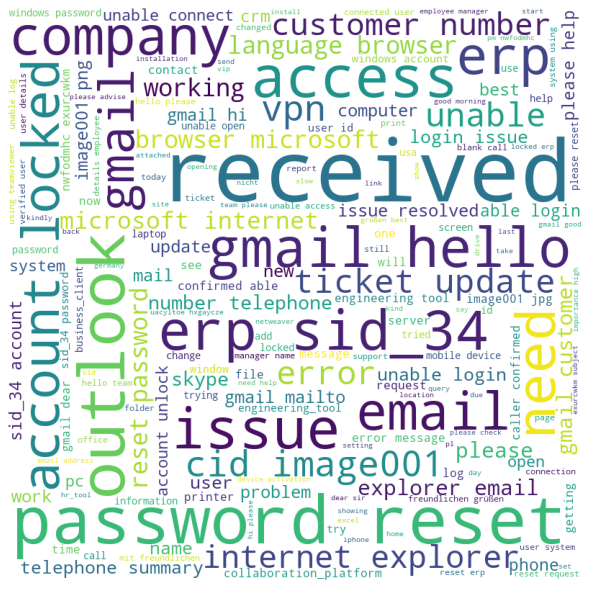

In [50]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_0']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

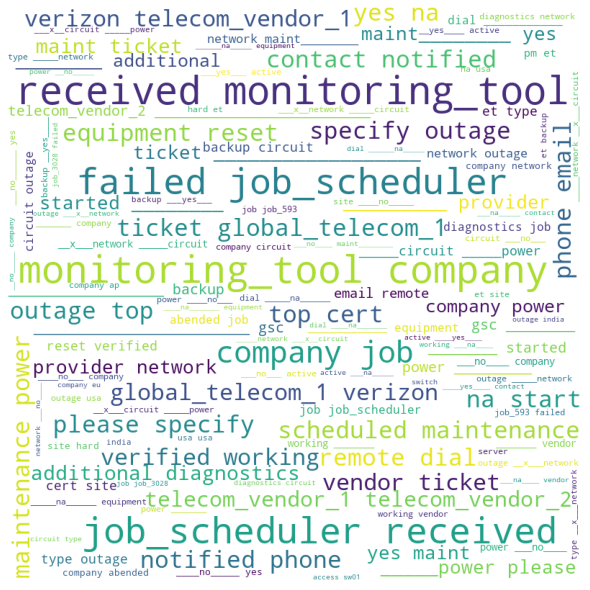

In [51]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_8']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

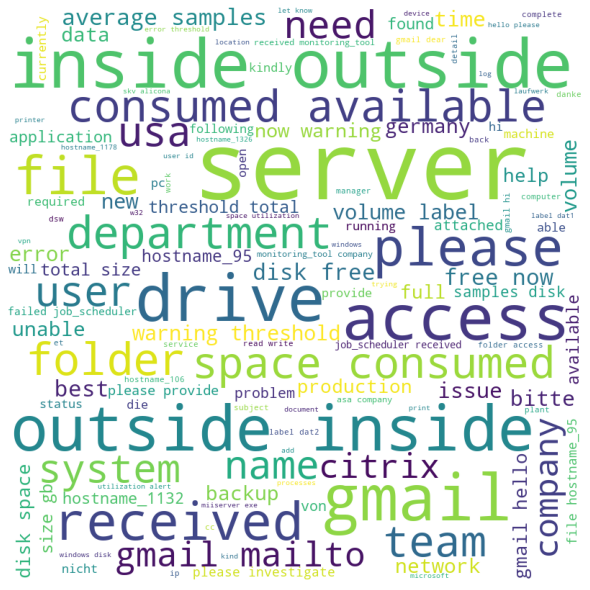

In [52]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_12']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

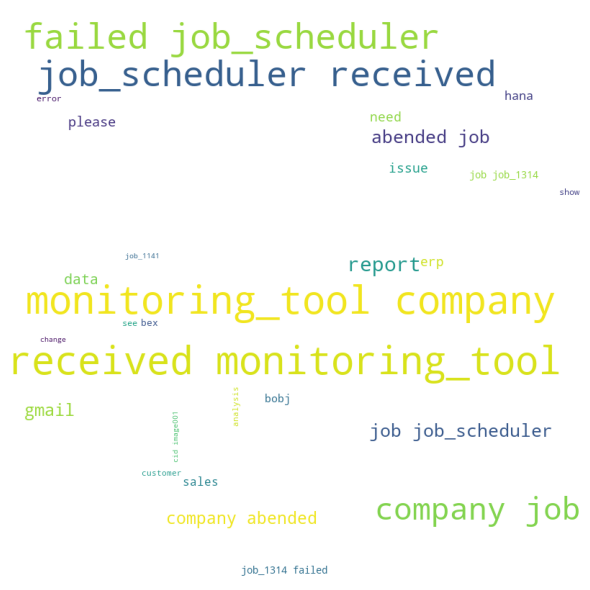

In [53]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_9']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

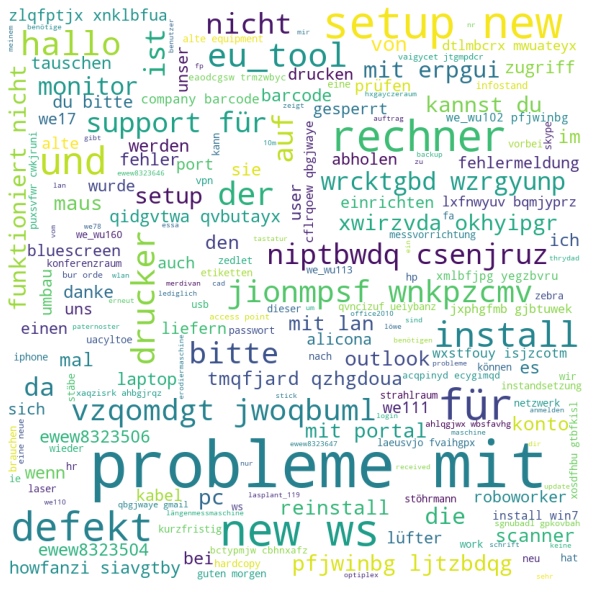

In [54]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_24']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

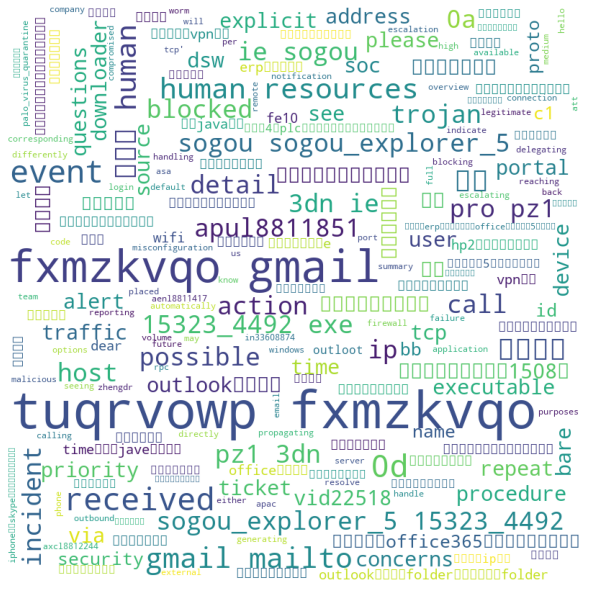

In [55]:
wordcloud = fn_word_cloud(mydata2[mydata2['Assignment group']=='GRP_30']["Combined description"])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

#### Observation
- Many non english words in GRP_24
- In GRP_30 there are many special characters 
#### Let us take a quick diversion to look into this further a little bit more
- We will first run the google's language detect in multi-threaded fashion

In [56]:
pool = ThreadPool(20) # Threads

def request(text):
    #lang = "zh"
    t = google_translator(timeout=20)
#    print("Detect Text " + text)
    detect_text = t.detect(text)
    #print(detect_text)
    return detect_text

if __name__ == "__main__" :
      time1 = time.time()
      #with open("datasets/ShortDescriptions.txt",'r',encoding='utf-8') as f_p:
      # texts = f_p.readlines()
      #print(texts)
      data = mydata2['Short description'].values.tolist()
      try:
          results = pool.map(request, data)
          #print(results)
      except Exception as e:
          raise e
      pool.close()
      pool.join()

      time2 = time.time()
      print("Detecting %s Short Desciptions, a total of %s s"%(len(data),time2 - time1))

Detecting 8500 Short Desciptions, a total of 32.87682580947876 s


#### We will load the results to a dataframe and print the last few rows

In [57]:
df = pd.DataFrame (results,columns=['language', 'language name'])
df.tail()

,language,language name
8495,en,english
8496,en,english
8497,en,english
8498,pt,portuguese
8499,de,german


In [58]:
mydata2.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description
False,8500,8500,8500,8500,8500,8500


In [59]:
df.isna().apply(pd.value_counts)

,language,language name
False,8500,8500


#### Counts by language

In [60]:
df["language"].value_counts()

en       7578
de        634
zh-CN     145
nl         22
pt         18
lb          9
pl          9
da          8
hi          8
ar          7
ro          6
fr          5
ru          4
el          4
sv          4
es          4
gl          3
tl          3
mt          3
hu          3
gu          2
ja          2
vi          2
no          1
uz          1
af          1
fy          1
zu          1
sm          1
mr          1
ca          1
cy          1
bn          1
eu          1
fi          1
ku          1
sl          1
cs          1
it          1
tr          1
Name: language, dtype: int64

### We will graph the distribution of languages

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


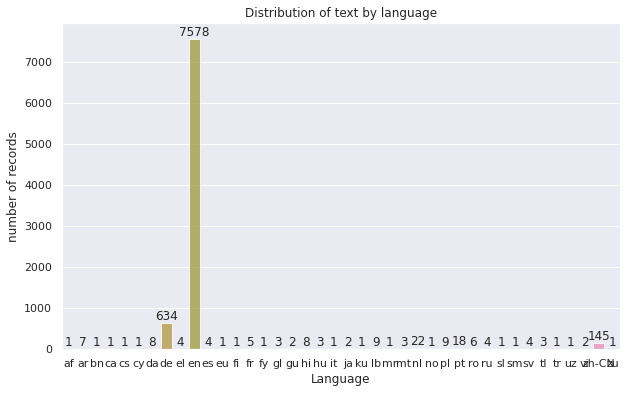

In [61]:
cycol = cycle('bgrcmk')
x = df["language"].value_counts()
x=x.sort_index()
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

# Observation
- Most items are in English followed by German
- The other languages are in low single digits - a could in low 2 digits. 

In [62]:
##Reconfirmation
null_data = mydata2[mydata2.isnull().any(axis=1)]
null_data

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description


#### We will merge the language columns into the main dataframe

In [63]:
df

,language,language name
0,en,english
1,en,english
2,en,english
3,en,english
4,en,english
...,...,...
8495,en,english
8496,en,english
8497,en,english
8498,pt,portuguese


In [64]:
mydata3=mydata.copy()
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count
False,8500,8500,8500,8500,8500


In [65]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count
False,8500,8500,8500,8500,8500


In [66]:
mydata = mydata2.join(df)
mydata.tail()

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,GRP_29,emails not coming in from zz mail received fro...,21,emails not coming in from zz mail received fro...,en,english
8496,telephony_software issue,telephony_software issue,GRP_0,telephony_software issue,2,telephony_software issue,en,english
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,GRP_0,vip2: windows password reset for tifpdchb pedx...,7,vip2: windows password reset for tifpdchb pedx...,en,english
8498,machine não está funcionando,i am unable to access the machine utilities to...,GRP_62,machine não está funcionando i am unable to ac...,18,machine não está funcionando i am unable to ac...,pt,portuguese
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,GRP_49,an mehreren pc`s lassen sich verschiedene prgr...,11,an mehreren pc`s lassen sich verschiedene prgr...,de,german


#### Observation
- It is interesting to see row 8498 . Short description is in Portugese but Description is in English. 
- The Combine Description gets interpreted as English (we ran the detect alogrithm separately to confirm this)

#### This is the reason we decided to translate Short description and Description independently and then merge them.

In [67]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name


In [68]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
#empty_space[['Raw Combined description', 'Assignment group']]
empty_space

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name


In [69]:
# Select columns for cleaning
#columnsToPreprocess = ['Short description', 'Description']
#columnsToPreprocess = ['Combined description', 'Short description', 'Description']
# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
#mydata = preprocess(mydata, columnsToPreprocess, getRegexList())

In [70]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name


In [71]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
empty_space

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name


### We will attempt Translation into english all the non-english rows

In [72]:
pool = ThreadPool(20) # Threads

def request(text):
    t = google_translator(timeout=20)
    translate_text = t.translate(text, lang_tgt='en')
    return translate_text

if __name__ == "__main__" :
      time1 = time.time()
      data = mydata['Short description'].values.tolist()
      try:
          results = pool.map(request, data)
          #print(results)
      except Exception as e:
          raise e
      pool.close()
      pool.join()

      time2 = time.time()

In [73]:
print("Translating %s Short Descriptions, a total of %s s"%(len(data),time2 - time1))

Translating 8500 Short Descriptions, a total of 35.416003465652466 s


In [74]:
df = pd.DataFrame (results,columns=['Translated Short description'])
df.tail()

,Translated Short description
8495,emails not coming in from zz mail
8496,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...
8498,machine is not working
8499,Different programs cannot be opened on several...


In [75]:
## Missing data check #2 : 
## Are there any null values
mydata.isna().apply(pd.value_counts)
## Short Description contains 2 nulls and Description contains 1 null 

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name
False,8500,8500,8500,8500,8500,8500,8500,8500


In [76]:
df.isna().apply(pd.value_counts)

,Translated Short description
False,8500


In [77]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name


In [78]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]

#### We will merge the Translated Short description column into the main dataframe

In [79]:
mydata2 = mydata
mydata = mydata.join(df)
mydata.tail()

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,GRP_29,emails not coming in from zz mail received fro...,21,emails not coming in from zz mail received fro...,en,english,emails not coming in from zz mail
8496,telephony_software issue,telephony_software issue,GRP_0,telephony_software issue,2,telephony_software issue,en,english,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,GRP_0,vip2: windows password reset for tifpdchb pedx...,7,vip2: windows password reset for tifpdchb pedx...,en,english,vip2: windows password reset for tifpdchb pedx...
8498,machine não está funcionando,i am unable to access the machine utilities to...,GRP_62,machine não está funcionando i am unable to ac...,18,machine não está funcionando i am unable to ac...,pt,portuguese,machine is not working
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,GRP_49,an mehreren pc`s lassen sich verschiedene prgr...,11,an mehreren pc`s lassen sich verschiedene prgr...,de,german,Different programs cannot be opened on several...


In [80]:
pool = ThreadPool(20) # Threads

def request(text):
    t = google_translator(timeout=25)
    translate_text = t.translate(text.strip(), lang_tgt='en')
    return translate_text

if __name__ == "__main__" :
      time1 = time.time()
      data = mydata['Description'].values.tolist()
      try:
          results = pool.map(request, data)
          #print(results)
      except Exception as e:
          raise e
      pool.close()
      pool.join()

      time2 = time.time()
      print("Translating %s Descriptions, a total of %s s"%(len(data),time2 - time1))

Translating 8500 Descriptions, a total of 34.209768772125244 s


In [81]:
 print("Translating %s Descriptions, a total of %s s"%(len(data),time2 - time1))

Translating 8500 Descriptions, a total of 34.209768772125244 s


In [82]:
df = pd.DataFrame (results,columns=['Translated Description'])
df.tail()

,Translated Description
8495,received from: avglmrts.vhqmtiua@gmail.com\n\n...
8496,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...
8498,i am unable to access the machine utilities to...
8499,Different programs cannot be opened on several...


In [83]:
## Missing data check #2 : 
## Are there any null values
mydata.isna().apply(pd.value_counts)
## Short Description contains 2 nulls and Description contains 1 null 

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description
False,8500,8500,8500,8500,8500,8500,8500,8500,8500


In [84]:
df.isna().apply(pd.value_counts)

,Translated Description
False,8500


#### We will merge the Combined Description column into the main dataframe

In [85]:
mydata2 = mydata
mydata = mydata.join(df)
mydata.tail()

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,GRP_29,emails not coming in from zz mail received fro...,21,emails not coming in from zz mail received fro...,en,english,emails not coming in from zz mail,received from: avglmrts.vhqmtiua@gmail.com\n\n...
8496,telephony_software issue,telephony_software issue,GRP_0,telephony_software issue,2,telephony_software issue,en,english,telephony software issue,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,GRP_0,vip2: windows password reset for tifpdchb pedx...,7,vip2: windows password reset for tifpdchb pedx...,en,english,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine não está funcionando,i am unable to access the machine utilities to...,GRP_62,machine não está funcionando i am unable to ac...,18,machine não está funcionando i am unable to ac...,pt,portuguese,machine is not working,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,GRP_49,an mehreren pc`s lassen sich verschiedene prgr...,11,an mehreren pc`s lassen sich verschiedene prgr...,de,german,Different programs cannot be opened on several...,Different programs cannot be opened on several...


### We will merge the Short description and Description Columns again

In [86]:
#merging  the 2 preprocessed columns to a single column without duplicate words
mydata['Combined description'] = mydata['Translated Short description'] .map(str) + ' ' +  mydata['Translated Description'].map(str)
                    
mydata['Combined description'] = mydata['Combined description'].apply(lambda x: ' '.join(pd.unique(x.split()))) 
   
#testing on single entry
print(mydata.iloc[279]['Short description'])
print(mydata.iloc[279]['Description'])
print(mydata.iloc[279]['Combined description']) 
print(mydata.iloc[7126]['Short description'])
print(mydata.iloc[7126]['Combined description'])
print(mydata.iloc[7969]['Description'])
print(mydata.iloc[7969]['Combined description'])

unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment.
please provide the following:

what order number? 

what material or item number?  mm#2110924

what warehouse location? plant_308 0001 

issue description / error message? see attachment
unable to create delivery:mm#2110924 can print d/n, but can't post. detail information see attachment. please provide the following: what order number? material or item mm#2110924 warehouse location? plant_308 0001 issue description / error message? attachment
电脑卡且连不上内网
The computer card cannot connect to the intranet received from: tuqrvowp.fxmzkvqo@gmail.com is not connected intranet, please forward He Zhengping tuqrvowp fxmzkvqo Qian Tangxin human resources tuqrvowp.fxmzkvqo@gmail.com<mailto:tuqrvowp.fxmzkvqo@gmail.com> 1508 Chenqiao Road, Fengxian, Shanghai, China
客户提供的在线送货单生成系统打不开,需尽快解决
The online system provided by the customer cannot be opened delivery note generation and needs to resolved as s

In [87]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
False,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500


In [88]:
rows = mydata.iloc[8499]
rows

Short description               an mehreren pc`s lassen sich verschiedene prgr...
Description                     an mehreren pc`s lassen sich verschiedene prgr...
Assignment group                                                           GRP_49
Raw Combined description        an mehreren pc`s lassen sich verschiedene prgr...
raw_word_count                                                                 11
Combined description            Different programs cannot be opened on several...
language                                                                       de
language name                                                              german
Translated Short description    Different programs cannot be opened on several...
Translated Description          Different programs cannot be opened on several...
Name: 8499, dtype: object

In [89]:
mydata.tail()

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
8495,emails not coming in from zz mail,\n\nreceived from: avglmrts.vhqmtiua@gmail.com...,GRP_29,emails not coming in from zz mail received fro...,21,emails not coming in from zz mail received fro...,en,english,emails not coming in from zz mail,received from: avglmrts.vhqmtiua@gmail.com\n\n...
8496,telephony_software issue,telephony_software issue,GRP_0,telephony_software issue,2,telephony software issue,en,english,telephony software issue,telephony software issue
8497,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...,GRP_0,vip2: windows password reset for tifpdchb pedx...,7,vip2: windows password reset for tifpdchb pedx...,en,english,vip2: windows password reset for tifpdchb pedx...,vip2: windows password reset for tifpdchb pedx...
8498,machine não está funcionando,i am unable to access the machine utilities to...,GRP_62,machine não está funcionando i am unable to ac...,18,machine is not working i am unable to access t...,pt,portuguese,machine is not working,i am unable to access the machine utilities to...
8499,an mehreren pc`s lassen sich verschiedene prgr...,an mehreren pc`s lassen sich verschiedene prgr...,GRP_49,an mehreren pc`s lassen sich verschiedene prgr...,11,Different programs cannot be opened on several...,de,german,Different programs cannot be opened on several...,Different programs cannot be opened on several...


In [90]:
row = mydata.iloc[1954]
row

Short description                                          笔记本重新装下系统
Description                                             把我的笔记本重新装下系统
Assignment group                                              GRP_30
Raw Combined description                      笔记本重新装下系统 把我的笔记本重新装下系统
raw_word_count                                                     2
Combined description            Reinstall the system on laptop my in
language                                                       zh-CN
language name                                   chinese (simplified)
Translated Short description     Reinstall the system on the laptop 
Translated Description            Reinstall my laptop in the system 
Name: 1954, dtype: object

In [91]:
df = mydata.query('Description == ""')
df

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description


In [92]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
empty_space

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description


In [93]:
mydata.iloc[1178,:]

Short description                                电话机没有声音
Description                                      电话机没有声音
Assignment group                                  GRP_30
Raw Combined description                         电话机没有声音
raw_word_count                                         1
Combined description             No sound from the phone
language                                           zh-CN
language name                       chinese (simplified)
Translated Short description    No sound from the phone 
Translated Description          No sound from the phone 
Name: 1178, dtype: object

# Preprocessing
### We will now attempt to remove unwanted text in the columns of interest to us: 
- Combined description

In [94]:
# Select columns for cleaning
#columnsToPreprocess = ['Short description', 'Description']
columnsToPreprocess = ['Combined description']
# Create list of regex to remove sensitive data
# Clean dataset and remove sensitive data
mydata = preprocess(mydata, columnsToPreprocess, getRegexList())

In [95]:
mydata.head(20)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,login issue -verified user details.(employee# ...,28,login issue verified user detailsemployee mana...,en,english,login issue,-verified user details.(employee# & manager na...
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,GRP_0,outlook received from: hmjdrvpb.komuaywn@gmail...,24,outlook received from hmjdrvpbkomuaywngmailcom...,en,english,outlook,received from: hmjdrvpb.komuaywn@gmail.com\n\n...
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,GRP_0,cant log in to vpn received from: eylqgodm.ybq...,13,cant log in to vpn received from eylqgodmybqkw...,en,english,cant log in to vpn,received from: eylqgodm.ybqkwiam@gmail.com\n\n...
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,unable to access hr_tool page,5,unable to access hr tool page,en,english,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,GRP_0,skype error,2,skype error,en,english,skype error,skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,GRP_0,unable to log in engineering tool and skype,8,unable to log in engineering tool and skype,en,english,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,GRP_1,event: critical:HostName_221.company.com the v...,12,event criticalhostname companycom the value of...,en,english,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,GRP_0,ticket_no1550391- employment status - new non-...,9,ticket no employment status new nonemployee en...,en,english,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,GRP_0,unable to disable add ins on outlook,7,unable to disable add ins on outlook,en,english,unable to disable add ins on outlook,unable to disable add ins on outlook
9,ticket update on inplant_874773,ticket update on inplant_874773,GRP_0,ticket update on inplant_874773,4,ticket update on inplant,en,english,ticket update on inplant_874773,ticket update on inplant_874773


In [96]:
##Reconfirmation
empty_space = mydata[mydata['Combined description'] == ""]
empty_space

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
8043,setup new ws \xaqzisrk ahbgjrqz,setup new ws \xaqzisrk ahbgjrqz,GRP_24,setup new ws \xaqzisrk ahbgjrqz,5,,el,greek,σετύπ νέω ως \ χάκζησρκ αχβγξρκζ,σετύπ νέω ως \ χάκζησρκ αχβγξρκζ
8072,setup new ws \pnwbkitv phbnwmkl,setup new ws \pnwbkitv phbnwmkl,GRP_24,setup new ws \pnwbkitv phbnwmkl,5,,el,greek,σετύπ νέω ως \ πνωβκίτυ φβνωμκλ,σετύπ νέω ως \ πνωβκίτυ φβνωμκλ


In [97]:
mydata.at[8043,'Combined description']=mydata.iloc[8043]['Description']
mydata.at[8072,'Combined description']=mydata.iloc[8072]['Description']

# Observation
- For some reason the translation got confused and marked these as Greek and also translated to Greek . We are manually fixing these back to English

In [98]:
#expand contractions

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))
# Expanding Contractions in the reviews
mydata['Combined description']=mydata['Combined description'].apply(lambda x:expand_contractions(x))

In [99]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
False,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500


In [100]:
spell =Speller('en', fast=True)       #Speller(fast=True) for faster but less accurate correctiondata
mydata['Combined description']=[' '.join([spell(i) for i in x.split()]) for x in mydata['Combined description']]

In [101]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
False,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500


In [102]:
mydata.iloc[255]

Short description               probleme mit laufwerk z: \laeusvjo fvaihgpx
Description                     probleme mit laufwerk z: \laeusvjo fvaihgpx
Assignment group                                                     GRP_24
Raw Combined description        probleme mit laufwerk z: \laeusvjo fvaihgpx
raw_word_count                                                            6
Combined description                problems with drive z laeusvjo fvaihgpx
language                                                                 de
language name                                                        german
Translated Short description    problems with drive z: \ laeusvjo fvaihgpx 
Translated Description          problems with drive z: \ laeusvjo fvaihgpx 
Name: 255, dtype: object

In [103]:
#Remove non english words
nltk.download('words')
from nltk.corpus import words
Word = list(set(words.words()))
mydata['Combined description'] = [" ".join(w for w in nltk.wordpunct_tokenize(x) 
                       if w.lower() in Word or not w.isalpha()) 
                       for x in mydata['Combined description']]

#testing one a single entry
print(mydata.iloc[255]['Combined description'])

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
with drive z


In [104]:
rows = mydata[mydata['Combined description'] == ""]
print(rows.index)
rows

Int64Index([ 698, 2045, 2070, 2192, 3050, 3432, 4637, 4776, 4857, 5179, 5415,
            5502, 6366, 6496, 6929, 7209, 7391],
           dtype='int64')


,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description
698,jpg files encrypted,jpg files encrypted,GRP_0,jpg files encrypted,3,,en,english,jpg files encrypted,jpg files encrypted
2045,uacyltoe hxgaycze,uacyltoe hxgaycze,GRP_12,uacyltoe hxgaycze,2,,pl,polish,uacyltoe hxgaycze,uacyltoe hxgaycze
2070,uacyltoe hxgaycze,uacyltoe hxgaycze,GRP_36,uacyltoe hxgaycze,2,,pl,polish,uacyltoe hxgaycze,uacyltoe hxgaycze
2192,uacyltoe hxgaycze,uacyltoe hxgaycze,GRP_0,uacyltoe hxgaycze,2,,pl,polish,uacyltoe hxgaycze,uacyltoe hxgaycze
3050,vpn disconnecting,vpn disconnecting,GRP_0,vpn disconnecting,2,,en,english,vpn disconnecting,vpn disconnecting
3432,dds,dss,GRP_0,dds dss,2,,en,english,dds,dss
4637,erp queries,erp queries,GRP_0,erp queries,2,,en,english,erp queries,erp queries
4776,restoring ppt,restoring ppt,GRP_0,restoring ppt,2,,en,english,restoring ppt,restoring ppt
4857,vpn queries,vpn queries,GRP_0,vpn queries,2,,en,english,vpn queries,vpn queries
5179,windows zdsxmcwu thdjzolw,windows zdsxmcwu thdjzolw,GRP_0,windows zdsxmcwu thdjzolw,3,,en,english,windows zdsxmcwu thdjzolw,windows zdsxmcwu thdjzolw


# Observation
- For some reason the translation and remove regex alogrithms got confused and did not do their job for these rows properly . We are manually fixing these entries
- We can drop rows  2045, 2070, 2192 because they look like junk BUT at this point we will just keep them

In [105]:
for row_no in rows.index:
    mydata.at[row_no,'Combined description']=mydata.iloc[row_no]['Raw Combined description']

In [106]:
rows = mydata[mydata['Combined description'] == ""]
rows

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description


# We are creating the dataset required for Deep Learning first
- This data set contains all the stop words too which are important for DL algorithms for Context retention
- This dataset will not contain the lemmatization  which is to follow later

In [107]:
mydata_dl = mydata[['Combined description', 'Assignment group']]
#mydata_dl = mydata_dl.drop(mydata_dl.index[mydata_dl["Combined description"] == ''])
mydata_dl = mydata_dl.rename(columns = {'Combined description':'Combined Description Cleaned'}) 
mydata_dl = mydata_dl.reset_index(drop=True)
mydata_dl.to_csv('drive/My Drive/datasets/input_data_after_preprocessing_for_dl.csv') 
mydata_dl.describe()

,Combined Description Cleaned,Assignment group
count,8500,8500
unique,6426,74
top,job job in job schedule at received from,GRP_0
freq,431,3976


In [108]:
mydata_dl

,Combined Description Cleaned,Assignment group
0,login issue user manager name checked the name...,GRP_0
1,outlook received from hello team my are not in...,GRP_0
2,cannot log in to received from hi i cannot on ...,GRP_0
3,unable to access tool page,GRP_0
4,error,GRP_0
...,...,...
8495,not coming in from mail received from good aft...,GRP_29
8496,telephony issue,GRP_0
8497,password reset for,GRP_0
8498,machine is not working i am unable to access t...,GRP_62


In [109]:
mydata['CombinedWordCount'] = [len(desc.split(' ')) for desc in mydata['Combined description']]
mydata.head()
wordCount_before_lemmatization = mydata['CombinedWordCount'].sum()
print("Total Corpus Word Count before lemmatization: ", wordCount_before_lemmatization)

Total Corpus Word Count before lemmatization:  137509


In [110]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description,CombinedWordCount
False,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500


In [111]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.add('please')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'p

In [112]:
nltk.download('punkt')
nltk.download('wordnet')
mydata['Combined Description Cleaned'] = lemmatize(mydata['Combined description'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [113]:
mydata['CombinedWordCountCleaned'] = [len(desc.split(' ')) for desc in mydata['Combined Description Cleaned']]
wordCount_after_lemmatization = mydata['CombinedWordCountCleaned'].sum()
print("Total Corpus Word Count after lemmatization: ", wordCount_after_lemmatization)
print("Max word count of a Document: ", mydata['CombinedWordCountCleaned'].max())
print("Mean word count of Documents: ", mydata['CombinedWordCountCleaned'].mean())

Total Corpus Word Count after lemmatization:  82251
Max word count of a Document:  143
Mean word count of Documents:  9.676588235294117


### Creating a vector of word counts
- we will use the CountVectoriser to tokenise the text and build a vocabulary of known words. 
- We first create a variable “cv” of the CountVectoriser class, and then evoke the fit_transform function to learn and build the vocabulary.

###### Parameters used
- cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
- max_df — When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). This is to ensure that we only have words relevant to the context and not commonly used words.
- max_features — determines the number of columns in the matrix.
- n-gram range — we would want to look at a list of single words, two words (bi-grams) and three words (tri-gram) combinations.

In [114]:
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(mydata['Combined description'])

### Visualize top 20 uni-grams, bi-grams & tri-grams

[Text(0, 0, 'job'),
 Text(0, 0, 'receive'),
 Text(0, 0, 'password'),
 Text(0, 0, 'tool'),
 Text(0, 0, 'schedule'),
 Text(0, 0, 'work'),
 Text(0, 0, 'reset'),
 Text(0, 0, 'issue'),
 Text(0, 0, 'unable'),
 Text(0, 0, 'user'),
 Text(0, 0, 'error'),
 Text(0, 0, 'access'),
 Text(0, 0, 'ticket'),
 Text(0, 0, 'need'),
 Text(0, 0, 'account'),
 Text(0, 0, 'hello'),
 Text(0, 0, 'help'),
 Text(0, 0, 'company'),
 Text(0, 0, 'get'),
 Text(0, 0, 'network'),
 Text(0, 0, 'system'),
 Text(0, 0, 'login'),
 Text(0, 0, 'outlook'),
 Text(0, 0, 'vendor'),
 Text(0, 0, 'message'),
 Text(0, 0, 'power'),
 Text(0, 0, 'see'),
 Text(0, 0, 'check'),
 Text(0, 0, 'send'),
 Text(0, 0, 'lock'),
 Text(0, 0, 'time'),
 Text(0, 0, 'try'),
 Text(0, 0, 'able'),
 Text(0, 0, 'hi'),
 Text(0, 0, 'new'),
 Text(0, 0, 'connect'),
 Text(0, 0, 'team'),
 Text(0, 0, 'open'),
 Text(0, 0, 'outage'),
 Text(0, 0, 'best'),
 Text(0, 0, 'name'),
 Text(0, 0, 'log'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'number'),
 Text(0, 0, 'update'),
 Text(0

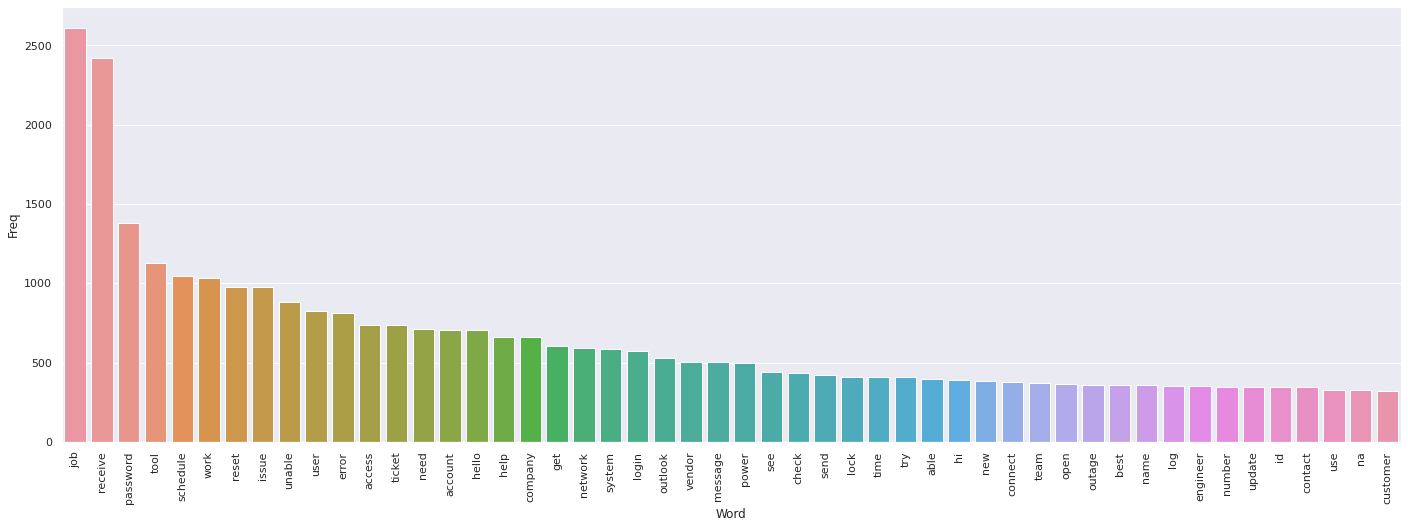

In [115]:
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(mydata['Combined Description Cleaned'], n=50)
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

#Barplot of most freq words
sns.set(rc={'figure.figsize':(24,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'job job'),
 Text(0, 0, 'job schedule'),
 Text(0, 0, 'schedule receive'),
 Text(0, 0, 'receive hello'),
 Text(0, 0, 'password reset'),
 Text(0, 0, 'reset password'),
 Text(0, 0, 'account lock'),
 Text(0, 0, 'engineer tool'),
 Text(0, 0, 'management tool'),
 Text(0, 0, 'password management'),
 Text(0, 0, 'collaboration platform'),
 Text(0, 0, 'receive hi'),
 Text(0, 0, 'error message'),
 Text(0, 0, 'customer number'),
 Text(0, 0, 'language explorer'),
 Text(0, 0, 'explorer customer'),
 Text(0, 0, 'receive dear'),
 Text(0, 0, 'ticket update'),
 Text(0, 0, 'number telephone'),
 Text(0, 0, 'ticket global'),
 Text(0, 0, 'schedule job'),
 Text(0, 0, 'vendor vendor'),
 Text(0, 0, 'unable login'),
 Text(0, 0, 'power specify'),
 Text(0, 0, 'specify outage'),
 Text(0, 0, 'outage top'),
 Text(0, 0, 'maintenance power'),
 Text(0, 0, 'provider network'),
 Text(0, 0, 'contact notify'),
 Text(0, 0, 'remote dial'),
 Text(0, 0, 'equipment reset'),
 Text(0, 0, 'vendor ticket'),
 Text(0, 0, '

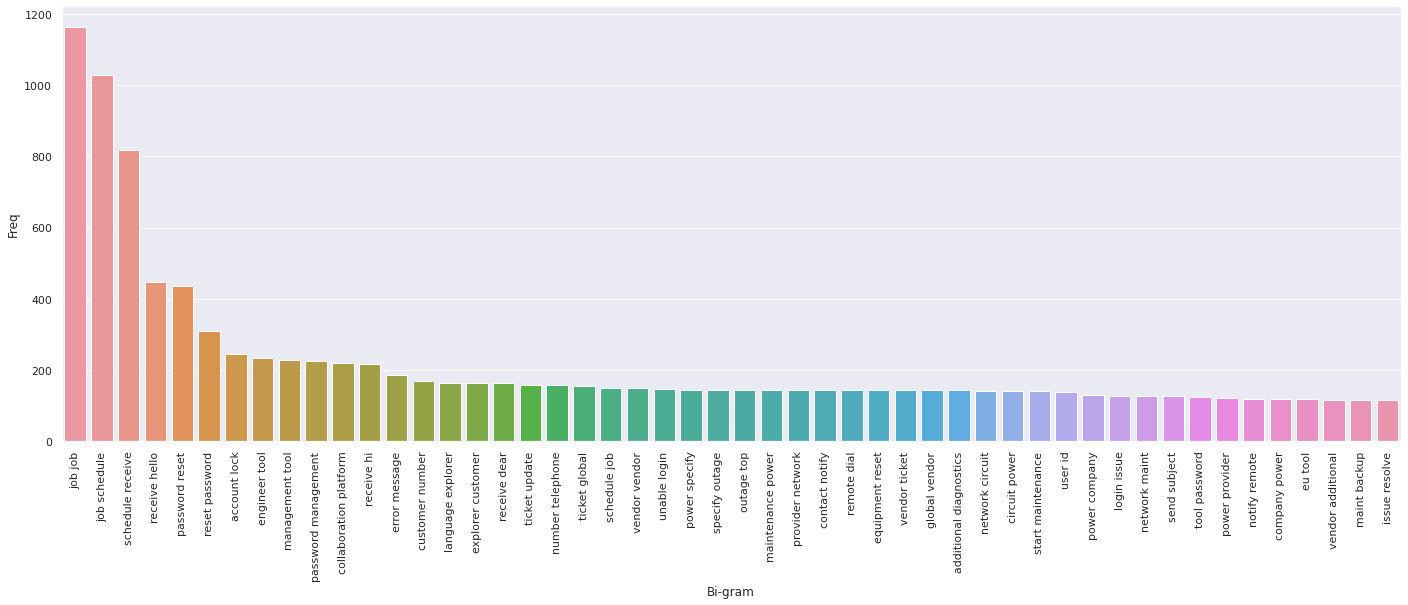

In [116]:
top2_words = get_top_n2_words(mydata['Combined Description Cleaned'], n=50)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
#print(top2_df)

#Barplot of most freq Bi-grams
sns.set(rc={'figure.figsize':(24,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=90)

[Text(0, 0, 'job schedule receive'),
 Text(0, 0, 'job job schedule'),
 Text(0, 0, 'job job job'),
 Text(0, 0, 'password management tool'),
 Text(0, 0, 'explorer customer number'),
 Text(0, 0, 'language explorer customer'),
 Text(0, 0, 'customer number telephone'),
 Text(0, 0, 'job schedule job'),
 Text(0, 0, 'power specify outage'),
 Text(0, 0, 'specify outage top'),
 Text(0, 0, 'vendor ticket global'),
 Text(0, 0, 'ticket global vendor'),
 Text(0, 0, 'global vendor vendor'),
 Text(0, 0, 'circuit power specify'),
 Text(0, 0, 'start maintenance power'),
 Text(0, 0, 'network circuit power'),
 Text(0, 0, 'maintenance power company'),
 Text(0, 0, 'provider network maint'),
 Text(0, 0, 'power provider network'),
 Text(0, 0, 'contact notify remote'),
 Text(0, 0, 'notify remote dial'),
 Text(0, 0, 'company power provider'),
 Text(0, 0, 'vendor vendor additional'),
 Text(0, 0, 'vendor additional diagnostics'),
 Text(0, 0, 'power company power'),
 Text(0, 0, 'management tool password'),
 Text(0

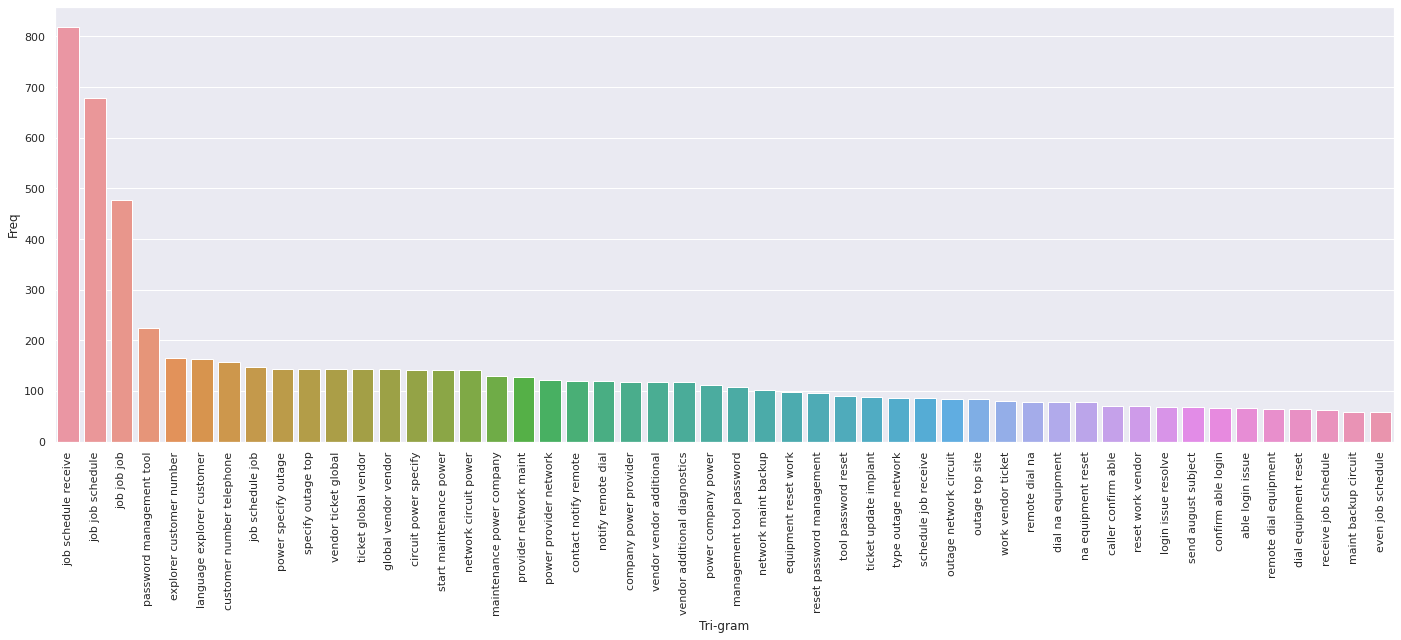

In [117]:
top3_words = get_top_n3_words(mydata['Combined Description Cleaned'], n=50)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
#print(top3_df)
#Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(24,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=90)

#### Based on the TF-IDF scores, we can extract the words with the highest scores to get the keywords for a document.

In [118]:
# iterate over rows with iterrows()
doc = ' '
for index, row in mydata.iterrows():
     # access data using column names
     doc = doc + row['Combined Description Cleaned']

In [119]:
doc

' login issue user manager name check name ad reset password advise check caller confirm able login issue resolveoutlook receive hello team calendar somebody advise correct kindlog receive hi bestunable access tool pageerrorunable log engineer toolevent value thresholdticket employment status new enter nameunable disable add outlookticket update implantengineer tool connect unable submittool site load page correctlyunable login tooluser reset passwordunable openticket update implantunable login company receive hi try open new session link able get help urgently work home tomorrow due month endunlock screen come backaccount lockunable signunable checkissue receive hello able connect home office couple f ago connect work get message session click link nothing need help dynamic chat live agent regard bestunable connectuser vendor phone numberwork receive hello able connect company network check sir result networkpassword resetunable login tool checkaccount lockunable login toolunable logp

In [120]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted

#doc=mydata['Combined Description Cleaned'][0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,50)
 
# now print the results
#print("\nAbstract:")
#print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Keywords:
receive 0.394
job 0.25
work 0.176
schedule 0.159
job schedule 0.157
tool 0.15
password 0.134
issue 0.121
get 0.117
hello 0.115
vendor 0.112
user 0.109
error 0.108
send 0.106
power 0.105
try 0.099
company 0.098
network 0.096
need 0.095
system 0.093
help 0.091
access 0.088
message 0.087
outage 0.085
ticket 0.085
follow 0.085
job job 0.083
job job schedule 0.082
see 0.081
login 0.079
reset 0.078
attach 0.078
na 0.077
time 0.077
hi 0.074
check 0.073
team 0.072
use 0.069
yes 0.069
engineer 0.068
name 0.068
number 0.067
connect 0.066
lock 0.063
customer 0.063
open 0.061
circuit 0.061
new 0.061
dial 0.06
plant 0.06


In [121]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description,CombinedWordCount,Combined Description Cleaned,CombinedWordCountCleaned
False,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500


### Milestone 1 - So far we have performed these steps

1. Exploring the given Data files
2. Understanding the structure of data
3. Missing points in data
4. Finding inconsistencies in the data
5. Visualizing different patterns
6. Visualizing different text features
7. Dealing with missing values
8. Text preprocessing
9. Creating word vocabulary from the corpus of report text data
10. Creating tokens as required

### Now we will run a quick model on how it performs in predicting the group with the data we have.
### Then we will explore different data augmentation techniques (in a different notebook)

In [122]:
mydata.isna().apply(pd.value_counts)

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description,CombinedWordCount,Combined Description Cleaned,CombinedWordCountCleaned
False,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500,8500


In [123]:
#mydata['Combined Description Cleaned'] = mydata['Combined Description Cleaned'].replace(np.nan, '', regex=True)

# We will now create the preprocessed dataset required for Machine Learning

In [124]:
mydata_ml = mydata[['Combined Description Cleaned', 'Assignment group']]
mydata_ml = mydata_dl.drop(mydata_dl.index[mydata_dl["Combined Description Cleaned"] == ''])
mydata_ml = mydata_dl.reset_index(drop=True)
mydata_ml.to_csv('drive/My Drive/datasets/input_data_after_preprocessing_for_dl.csv') 
mydata_ml.describe()

,Combined Description Cleaned,Assignment group
count,8500,8500
unique,6426,74
top,job job in job schedule at received from,GRP_0
freq,431,3976


In [125]:
##Reconfirmation
null_data = mydata[mydata.isnull().any(axis=1)]
null_data

,Short description,Description,Assignment group,Raw Combined description,raw_word_count,Combined description,language,language name,Translated Short description,Translated Description,CombinedWordCount,Combined Description Cleaned,CombinedWordCountCleaned


In [126]:
##Reconfirmation
empty_space = mydata[mydata['Combined Description Cleaned'] == ""]
empty_space.describe()

,raw_word_count,CombinedWordCount,CombinedWordCountCleaned
count,37.000000,37.000000,37.0
mean,5.189189,1.270270,1.0
std,1.897920,0.607758,0.0
min,1.000000,1.000000,1.0
25%,4.000000,1.000000,1.0
50%,5.000000,1.000000,1.0
75%,5.000000,1.000000,1.0
max,11.000000,4.000000,1.0


##### Label encode the target column

In [127]:
le = preprocessing.LabelEncoder()
mydata["LabelEncodings"] = le.fit_transform(mydata["Assignment group"])
y_classes_len = len(le.classes_)
le.classes_
print(y_classes_len)

74


In [128]:
y = np.asarray(mydata['LabelEncodings'])

In [129]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(mydata['Combined Description Cleaned'])
print(X_train_counts.shape)

(8500, 2938)


In [130]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(X_train_tfidf.shape)

(8500, 2938)


In [131]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y, test_size=0.3)

In [132]:
print(len(count_vect.vocabulary_))

2938


In [133]:
print(X_train.shape)
print(y_train.shape)

(5950, 2938)
(5950,)


In [134]:
print(X_test.shape)
print(y_test.shape)

(2550, 2938)
(2550,)


In [135]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='multinomial').fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print("Logistic Regression Score: ", acc_score)
f_sc = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print("Logistic Regression F1 Score: ", f_sc)

Logistic Regression Score:  0.6101960784313726
Logistic Regression F1 Score:  0.5783218046430143


In [136]:
##Reconfirmation
empty_space = mydata_dl[mydata_dl['Combined Description Cleaned'] == ""]
empty_space

,Combined Description Cleaned,Assignment group
